Quantidade de itens: 8
Capacidade máxima da mochila: 22
ITENS: [{'weight': 10, 'value': 20}, {'weight': 1, 'value': 3}, {'weight': 2, 'value': 9}, {'weight': 2, 'value': 19}, {'weight': 10, 'value': 5}, {'weight': 9, 'value': 2}, {'weight': 9, 'value': 20}, {'weight': 8, 'value': 19}]
Melhor solução encontrada: [1, 0, 1, 1, 0, 0, 0, 1]
Valor da melhor solução: 67


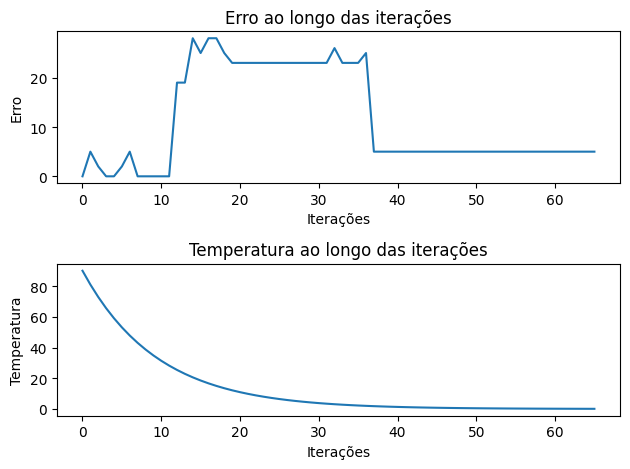

In [22]:
import random
import math
import matplotlib.pyplot as plt

# Faz a definição dos parâmetros
num_items = random.randint(5, 10)  # Define um número aleatório de itens de 5 a 10
print("Quantidade de itens:", num_items) 

max_capacity = random.randint(10, 40)  # Define uma capacidade máxima aleatória da mochila de 10 a 40
print("Capacidade máxima da mochila:", max_capacity) 

# Faz a geração dos itens aleatórios
items = []
for _ in range(num_items):
    weight = random.randint(1, 10)  # Define um peso aleatório para o item de 1 a 10
    value = random.randint(1, 20)  # Define um valor aleatório para o item de 1 a 20
    items.append({"weight": weight, "value": value})

print("ITENS:" , items)

# Parâmetros do Simulated Annealing
initial_temperature = 100
final_temperature = 0.1
cooling_rate = 0.9

# Função de avaliação
def evaluate_solution(solution):
    total_value = 0
    total_weight = 0

    for i in range(len(solution)):
        if solution[i] == 1:  # Item selecionado
            total_value += items[i]["value"]
            total_weight += items[i]["weight"]

    if total_weight > max_capacity:
        return 0  # Penalizar soluções inválidas

    return total_value

# Inicialização
current_solution = [random.randint(0, 1) for _ in range(len(items))]
best_solution = current_solution.copy()
best_value = evaluate_solution(best_solution)

# Simulated Annealing
temperature = initial_temperature
error_list = []  # Lista para armazenar os erros ao longo das iterações
temperature_list = []  # Lista para armazenar as temperaturas ao longo das iterações

while temperature > final_temperature:
    # Faz a geração de uma nova solução vizinha
    neighbor_solution = current_solution.copy()
    index = random.randint(0, len(current_solution) - 1)
    neighbor_solution[index] = 1 - neighbor_solution[index]  # Troca entre selecionado e não selecionado

    # Realiza o cálculo do valor da nova solução vizinha
    neighbor_value = evaluate_solution(neighbor_solution)

    # Realiza o cálculo do valor entre a nova solução vizinha e a solução atual
    delta_value = neighbor_value - evaluate_solution(current_solution)

    # Verifica se a nova solução vizinha é melhor
    if delta_value > 0:
        current_solution = neighbor_solution.copy()
        if neighbor_value > best_value:
            best_solution = neighbor_solution.copy()
            best_value = neighbor_value
    else:
        # Aceita a nova solução vizinha com uma probabilidade dependente da diferença de valor e da temperatura atual
        probability = math.exp(delta_value / temperature)
        if random.random() < probability:
            current_solution = neighbor_solution.copy()

    # Reduz a temperatura
    temperature *= cooling_rate

    # Calcula o erro e adiciona na lista
    error = best_value - evaluate_solution(current_solution)
    error_list.append(error)

    # Adiciona a temperatura na lista
    temperature_list.append(temperature)

# Resultados
print("Melhor solução encontrada:", best_solution)
print("Valor da melhor solução:", best_value)

# Gráfico de erros
plt.subplot(2, 1, 1)
plt.plot(error_list)
plt.xlabel('Iterações')
plt.ylabel('Erro')
plt.title('Erro ao longo das iterações')

# Gráfico de temperatura
plt.subplot(2, 1, 2)
plt.plot(temperature_list)
plt.xlabel('Iterações')
plt.ylabel('Temperatura')
plt.title('Temperatura ao longo das iterações')

plt.tight_layout()
plt.show()
